<div style="text-align:right"><span style="color:black; font-family:Georgia; font-size:1em">Document Created date:19-01-2020

<div style="text-align:center"><span style="color:green; font-family:Georgia; font-size:3em;">Human Activity Recognition</span></div>

<img src ='har.png'>

<div style="text-align:left"><span style="color:green; font-family:Georgia; font-size:2em;">Understanding Data</span></div>


<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

# Exercise : HAR_LSTM HYPERPARATEMER TUNING

In [20]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Unzip the Data
import zipfile
zipfile_from = zipfile.ZipFile('/content/drive/My Drive/HumanActivityRecognition.zip','r')
zipfile_from.extractall('/content/drive/My Drive/HumanActivityrecognition')
zipfile_from.close()

In [0]:
# Importing Libraries
import pandas as pd
import numpy as np

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data directory

In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/HumanActivityrecognition/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/My Drive/HumanActivityrecognition/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [0]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [0]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [35]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [36]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


### Model :: Defining the Architecture of LSTM(32) + Dropout(0.5) + rmsprop + sigmoid

In [19]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7352 samples, validate on 2947 samples
Epoch 1/30




7352/7352 [==============================] - 36s 5ms/step - loss: 1.3117 - acc: 0.4410 - val_loss: 1.1254 - val_acc: 0.4730
Epoch 2/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.9697 - acc: 0.5919 - val_loss: 0.8992 - val_acc: 0.5931
Epoch 3/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.7834 - acc: 0.6532 - val_loss: 0.7576 - val_acc: 0.6159
Epoch 4/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.6817 - acc: 0.6678 - val_loss: 0.6802 - val_acc: 0.6210
Epoch 5/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.6346 - acc: 0.6902 - val_loss: 0.6976 - val_acc: 0.6722
Epoch 6/30
7352/7352 [==============================] - 35s 5ms/step - loss: 0.6127 - acc: 0.7087 - val_loss: 0.7093 - val_acc: 0.7041
Epoch 7/30
7352/7352 [====================

In [22]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 510        0  ...                   0                26
SITTING                  0      376  ...                   2                 1
STANDING                 0       82  ...                   0                 1
WALKING                  0        0  ...                  28                 5
WALKING_DOWNSTAIRS       0        0  ...                 412                 8
WALKING_UPSTAIRS         0        0  ...                  24               430

[6 rows x 6 columns]


In [23]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 1s 367us/step


In [24]:
score

[0.5088777291587507, 0.8958262639972854]

- With a simple 2 layer architecture we got 90.09% accuracy and a loss of 0.30
- We can further imporve the performace with Hyperparameter tuning

### Model1:: Architecture of LSTM(32) + Dropout(0.5) + rmsprop + sigmoid

In [25]:
# Initiliazing the sequential model
model1 = Sequential()
# Configuring the parameters
model1.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model1.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model1.add(Dense(n_classes, activation='sigmoid'))
model1.summary()

# Compiling the model
model1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Training the model
history1 = model1.fit(X_train, Y_train, batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 37s 5ms/step - loss: 1.3362 - acc: 0.4445 - val_loss: 1.2370 - val_acc: 0.5131
Epoch 2/30
7352/7352 [==============================] - 35s 5ms/step - loss: 1.0587 - acc: 0.5453 - val_loss: 1.0204 - val_acc: 0.5080
Epoch 3/30
7352/7352 [==============================] - 36s 5ms/

In [26]:
# Confusion Matrix
print(confusion_matrix(Y_test, model1.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      380  ...                   0                 3
STANDING                 0       59  ...                   0                 0
WALKING                  0        0  ...                  14                14
WALKING_DOWNSTAIRS       0        0  ...                 413                 3
WALKING_UPSTAIRS         0        0  ...                  16               434

[6 rows x 6 columns]


In [27]:
score1 = model1.evaluate(X_test, Y_test)

2947/2947 [==============================] - 1s 383us/step


In [28]:
score1

[0.33480536445324116, 0.9155072955548015]

### Model2:: Architecture of LSTM(42) + Dropout(0.5) + rmsprop + sigmoid

In [29]:
# Initiliazing the sequential model
model2 = Sequential()
# Configuring the parameters
model2.add(LSTM(42, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model2.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model2.add(Dense(n_classes, activation='sigmoid'))
print(model2.summary())

# Compiling the model
model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Training the model
history2 = model2.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 42)                8736      
_________________________________________________________________
dropout_3 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 258       
Total params: 8,994
Trainable params: 8,994
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 39s 5ms/step - loss: 1.3137 - acc: 0.4222 - val_loss: 1.2687 - val_acc: 0.4136
Epoch 2/30
7352/7352 [==============================] - 37s 5ms/step - loss: 1.0355 - acc: 0.5498 - val_loss: 1.0039 - val_acc: 0.5416
Epoch 3/30
7352/7352 [==============================] - 37s

In [30]:
score2 = model2.evaluate(X_test, Y_test)

2947/2947 [==============================] - 1s 432us/step


In [31]:
score2

[0.8907021589124672, 0.8493383101459111]

### Model3:: Architecture of LSTM(80) + Dropout(0.25) + adam + sigmoid

In [32]:
# With One LSTM Layer Model 1  # 
n_hidden = 80

model3 = Sequential()

# 1 LSTM layer
model3.add(LSTM(n_hidden, input_shape = (timesteps, input_dim)))     # 1 LSTM

model3.add(Dropout(0.25))
model3.add(Dense(n_classes, activation = 'sigmoid'))
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 80)                28800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 486       
Total params: 29,286
Trainable params: 29,286
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
# Training the model
history3 = model3.fit(X_train,
          Y_train,
          batch_size=64,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 20s 3ms/step - loss: 0.4040 - acc: 0.8510 - val_loss: 0.3652 - val_acc: 0.8564
Epoch 2/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.3532 - acc: 0.8625 - val_loss: 0.3597 - val_acc: 0.8598
Epoch 3/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.3647 - acc: 0.8567 - val_loss: 0.3311 - val_acc: 0.8608
Epoch 4/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.3385 - acc: 0.8587 - val_loss: 0.3191 - val_acc: 0.8702
Epoch 5/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.3059 - acc: 0.8739 - val_loss: 0.2738 - val_acc: 0.8756
Epoch 6/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.2742 - acc: 0.8867 - val_loss: 0.2484 - val_acc: 0.8894
Epoch 7/30
7352/7352 [==============================] - 18s 2ms/step - loss: 0.2912 - acc: 0.8795 - val_loss: 0.2946 - val_acc: 0.8738
Epoch 8

In [34]:
score3 = model3.evaluate(X_test, Y_test)
print(score)

2947/2947 [==============================] - 2s 570us/step
[0.5088777291587507, 0.8958262639972854]


In [35]:
score3

[0.11640074694648317, 0.9629001287350948]

In [36]:
# Confusion Matrix
print(confusion_matrix(Y_test, model3.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 510        0  ...                   0                27
SITTING                  0      371  ...                   2                 7
STANDING                 0       81  ...                   0                12
WALKING                  0        0  ...                   6                 4
WALKING_DOWNSTAIRS       0        0  ...                 416                 1
WALKING_UPSTAIRS         0        0  ...                   9               405

[6 rows x 6 columns]


### Model4 :: Architecture of LSTM(80) + Dropout(0.25) + rmsprop + sigmoid

In [37]:
# With One LSTM Layer Model 1  # 
n_hidden = 80

model4 = Sequential()

# 1 LSTM layer
model4.add(LSTM(n_hidden, input_shape = (timesteps, input_dim), return_sequences = True))     # 1 LSTM

model4.add(Dropout(0.25))
model4.add(LSTM(n_hidden)) 
model4.add(Dense(n_classes, activation = 'sigmoid'))

model4.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model4.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 80)           28800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 80)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 486       
Total params: 80,806
Trainable params: 80,806
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
%%time
# Training the model
history4 = model4.fit(X_train,
          Y_train,
          batch_size= 64,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 47s 6ms/step - loss: 0.3401 - acc: 0.8628 - val_loss: 0.3149 - val_acc: 0.8722
Epoch 2/30
7352/7352 [==============================] - 44s 6ms/step - loss: 0.2328 - acc: 0.8961 - val_loss: 0.2118 - val_acc: 0.9044
Epoch 3/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.1679 - acc: 0.9306 - val_loss: 0.1756 - val_acc: 0.9288
Epoch 4/30
7352/7352 [==============================] - 44s 6ms/step - loss: 0.1274 - acc: 0.9525 - val_loss: 0.1292 - val_acc: 0.9493
Epoch 5/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.1017 - acc: 0.9632 - val_loss: 0.1161 - val_acc: 0.9540
Epoch 6/30
7352/7352 [==============================] - 44s 6ms/step - loss: 0.0801 - acc: 0.9708 - val_loss: 0.1106 - val_acc: 0.9562
Epoch 7/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.0653 - acc: 0.9759 - val_loss: 0.1052 - val_acc: 0.9612
Epoch 8

In [39]:
score4 = model4.evaluate(X_test, Y_test)
print(score4)

2947/2947 [==============================] - 4s 1ms/step
[0.09553245016018255, 0.9708743404444088]


In [40]:
# Confusion Matrix
print(confusion_matrix(Y_test, model4.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 535        0  ...                   0                 2
SITTING                  3      414  ...                   0                 2
STANDING                 0       80  ...                   0                 0
WALKING                  0        0  ...                  25                12
WALKING_DOWNSTAIRS       0        0  ...                 418                 1
WALKING_UPSTAIRS         0        0  ...                   5               466

[6 rows x 6 columns]


### Model5:: Architecture of LSTM(120) + Dropout(0.2) + l2 reg + rmsprop + sigmoid

In [38]:
# With One LSTM Layer Model 1  # 
from keras import regularizers
n_hidden = 120

model5 = Sequential()

# 1 LSTM layer
model5.add(LSTM(n_hidden, input_shape = (timesteps, input_dim),kernel_regularizer=regularizers.l2(0.001), return_sequences = True)) # 
model5.add(Dropout(0.2))
model5.add(LSTM(n_hidden))
model5.add(Dense(n_classes, activation = 'sigmoid'))

model5.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model5.summary())




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 120)          62400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 120)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 726       
Total params: 178,806
Trainable params: 178,806
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
# Training the model
history5 = model5.fit(X_train,
          Y_train,
          batch_size= 64,
          validation_data=(X_test, Y_test),
          epochs=epochs)



Train on 7352 samples, validate on 2947 samples
Epoch 1/30




7352/7352 [==============================] - 64s 9ms/step - loss: 0.3401 - acc: 0.8633 - val_loss: 0.3031 - val_acc: 0.8701
Epoch 2/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.2371 - acc: 0.8936 - val_loss: 0.2034 - val_acc: 0.9147
Epoch 3/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1735 - acc: 0.9275 - val_loss: 0.1988 - val_acc: 0.9175
Epoch 4/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1435 - acc: 0.9455 - val_loss: 0.1584 - val_acc: 0.9384
Epoch 5/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1283 - acc: 0.9526 - val_loss: 0.1741 - val_acc: 0.9325
Epoch 6/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.1031 - acc: 0.9649 - val_loss: 0.1710 - val_acc: 0.9416
Epoch 7/30
7352/7352 [==============================] - 62s 8ms/step - loss: 0.0879 - acc: 0.9700 - val_loss: 0.1748 - val_acc: 0.9423
E

In [40]:
score5 = model5.evaluate(X_test, Y_test)
score5

2947/2947 [==============================] - 5s 2ms/step


[0.09267068984828229, 0.9678203892133419]

In [41]:
# Confusion Matrix
print(confusion_matrix(Y_test, model5.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 502       35  ...                   0                 0
SITTING                  2      417  ...                   0                 6
STANDING                 0      112  ...                   0                 3
WALKING                  0        3  ...                  14                12
WALKING_DOWNSTAIRS       0        0  ...                 415                 0
WALKING_UPSTAIRS         0        0  ...                   2               441

[6 rows x 6 columns]


In [0]:
# utility function
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

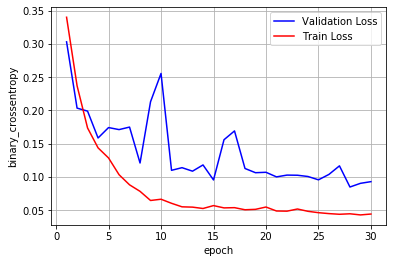

In [50]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('binary_crossentropy')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)


### Model6 :: Architecture of LSTM(120) + Dropout(0.7) + l2 reg + rmsprop + sigmoid

In [52]:
# With One LSTM Layer Model 1  # 
n_hidden = 120
# Initiliazing the sequential model
model6 = Sequential()

# Configuring the parameters
model6.add(LSTM(n_hidden, input_shape = (timesteps, input_dim),kernel_regularizer=regularizers.l2(0.01), return_sequences = True)) # 
model6.add(Dropout(0.7)) # Adding a dropout layer
model6.add(LSTM(n_hidden)) # Configuring the parameters
model6.add(Dropout(0.7)) # Adding a dropout layer
model6.add(Dense(n_classes, activation = 'sigmoid')) # Adding a dense output layer with sigmoid activation
# Compiling the model
model6.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model6.summary())
# Training the model
history6 = model6.fit(X_train,Y_train,batch_size=batch_size,validation_data=(X_test, Y_test),epochs=epochs)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 120)          62400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 120)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dropout_3 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 726       
Total params: 178,806
Trainable params: 178,806
Non-trainable params: 0
_________________________________________________________________
None
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 128s 

In [53]:
score6 = model6.evaluate(X_test, Y_test)
score6

2947/2947 [==============================] - 6s 2ms/step


[0.09851918673862693, 0.9741545128021396]

In [54]:
# Confusion MAtrix
print(confusion_matrix(Y_test, model6.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  1      376  ...                   0                 0
STANDING                 0       74  ...                   0                 0
WALKING                  0        0  ...                   8                16
WALKING_DOWNSTAIRS       0        0  ...                 417                 3
WALKING_UPSTAIRS         0        0  ...                  16               455

[6 rows x 6 columns]


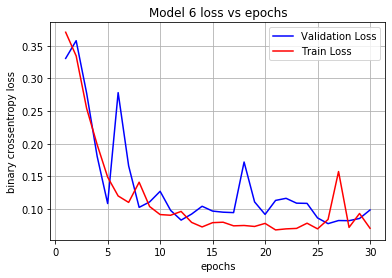

In [57]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('epochs');ax.set_ylabel('binary crossentropy loss');ax.set_title("Model 6 loss vs epochs")
x = list(range(1,31))

vy = history6.history['val_loss']
ty = history6.history['loss']

plt_dynamic(x, vy, ty, ax)

## Conclusion::

In [1]:
from prettytable import PrettyTable

p = PrettyTable()
p.field_names = ["Model","Hidden layer","epochs", "batch_size","activation","Optimizer","Dropout", "Val_Loss", "Val_acc %"]
p.add_row(['LSTM Model',  32, 30, 16, 'Sigmoid', 'rmsprop', 0.5, 0.5088, 0.8958])
p.add_row(['LSTM Model1', 32, 30, 16, 'Sigmoid', 'rmsprop', 0.5, 0.3348, 0.9155])
p.add_row(['LSTM Model2', 42, 30, 16, 'Sigmoid', 'rmsprop', 0.5, 0.8907, 0.8493])
p.add_row(['LSTM Model3', 80, 30, 64, 'Sigmoid', 'adam',   0.25, 0.1164, 0.9629])
p.add_row(['LSTM Model4', 80, 30, 64, 'Sigmoid', 'rmsprop', 0.25, 0.0955, 0.9708])
p.add_row(['LSTM Model5 with l2 Reg', 120, 30, 64, 'Sigmoid', 'rmsprop', 0.2, 0.0926, 0.9678])
p.add_row(['LSTM Model6 with l2 Reg', 120, 30, 16, 'Sigmoid', 'rmsprop', 0.7, 0.0985, 0.9741])
print(p)

+-------------------------+--------------+--------+------------+------------+-----------+---------+----------+-----------+
|          Model          | Hidden layer | epochs | batch_size | activation | Optimizer | Dropout | Val_Loss | Val_acc % |
+-------------------------+--------------+--------+------------+------------+-----------+---------+----------+-----------+
|        LSTM Model       |      32      |   30   |     16     |  Sigmoid   |  rmsprop  |   0.5   |  0.5088  |   0.8958  |
|       LSTM Model1       |      32      |   30   |     16     |  Sigmoid   |  rmsprop  |   0.5   |  0.3348  |   0.9155  |
|       LSTM Model2       |      42      |   30   |     16     |  Sigmoid   |  rmsprop  |   0.5   |  0.8907  |   0.8493  |
|       LSTM Model3       |      80      |   30   |     64     |  Sigmoid   |    adam   |   0.25  |  0.1164  |   0.9629  |
|       LSTM Model4       |      80      |   30   |     64     |  Sigmoid   |  rmsprop  |   0.25  |  0.0955  |   0.9708  |
| LSTM Model5 wi

### Observations ::

- By increasing the hidden layers to 80 we got a very good result of 0.9629 % with "adam" optimzier .
- Lstm + dropout(0.25) model ,with 80 hidden layers with "rmsprop" optimizer we got a test acccuracy of 0.9708 %.
- Lstm + Large dropout(0.7) model ,with 120 hidden layers with "sigmoid" activation function we got a test acccuracy of 0.9741%.


- Cite : https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b
- Cite : https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

<img src='hartq.png'>

<nav style="text-align:center">
<a href="https://www.linkedin.com/in/rameshbattuai/">**Sign Off RAMESH BATTU**</a></nav>
